In [ ]:
# #links
# https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb
# https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107
# https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

In [1]:
print(2)

2


### 1. Imports

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#### sklearn.tree.DecisionTreeClassifier
Parameters:
----------
* criterion: gini/entropy (Gini for gini impurity, entropy for information gain)
* max_depth: max depth of tree - how many childrens
---
* splits into: CART (classification tree) or regression tree

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

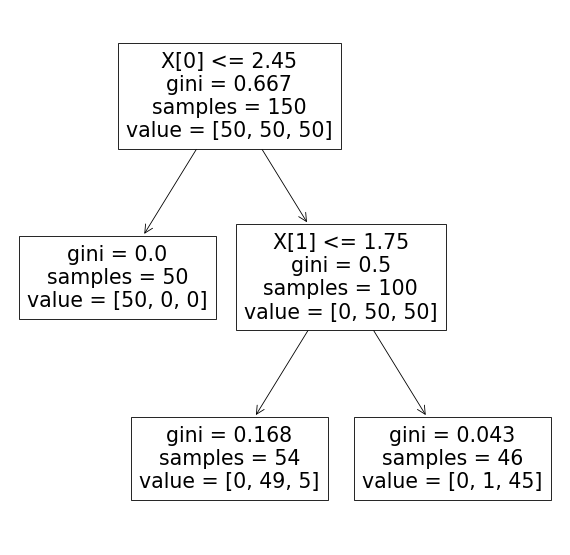

In [20]:
# export tree to tree.dot
tree.export_graphviz(tree_clf,
                     out_file="tree.dot",
                     feature_names=iris.feature_names[2:],
                     class_names=iris.target_names
)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=60)
tree.plot_tree(tree_clf)
fig.savefig('First_Decision_tree.png')


### 2. Making predictions
* select given element from train (or just whatever element), traverse the tree to find leaf node, either based on train we can check probability (as in plot), or check class

In [30]:
print(tree_clf.predict(X[[10]]))
print(tree_clf.predict_proba(X[[81]])) # 

[0]
[[0.         0.90740741 0.09259259]]


## about the alg
* how algorithm selects: search in pairs (k- which feature, t_k - threshold for given which gives best gini/information gain)
* once splits for 1 level, then it splits next time, till end or max_depth (and ather min/max hyperparaemets)
* obvious info - CART is greedy alg
* so either max depth levels / min elements per leaf/split etc
* pruning: as always
* https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

In [ ]:
# so basically: to make predictions first decision tree minimaze the cost function on tree -> which creates set of rules threshold -> 'visualization' ->
# now predict: take element, go from top to bot (traverse on tree) -> end up in correct leave - thats all

#### to notes:
* split to CART/regression
* cost function for cart and regression
* gini/entropy/example
* tldr short about pruning, pros and cons from list
* is this even worth to use 'decision tree regressor' -> if this will always return values from 'leaf node' and no impact?
* hyperparameters
* example from below - we removed one outlier? (max value) - and somehow this pair (feature, threshold_valeu) has changed - which lead to disaster (means: different classification)

## Sensitivity to training set details

Saving figure decision_tree_decision_boundaries_plot


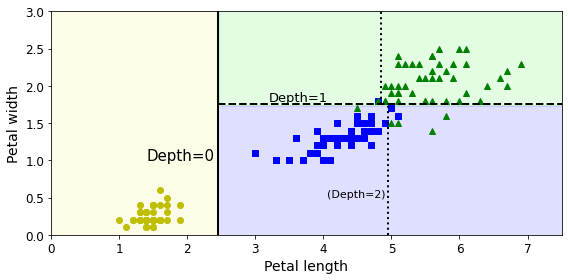

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [32]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [38]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)
# print(not_widest_versicolor)
print(X.shape)
print(y.shape)
print(X_tweaked.shape)

(150, 2)
(150,)
(149, 2)


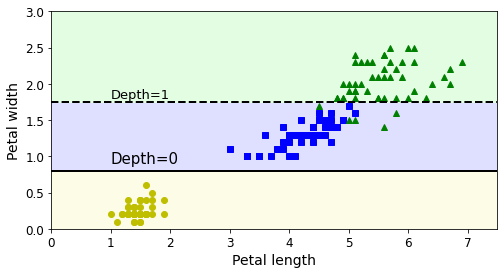

In [35]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

# save_fig("decision_tree_instability_plot")
plt.show()

### example: overfitting very dangerous for decision tree

Saving figure min_samples_leaf_plot


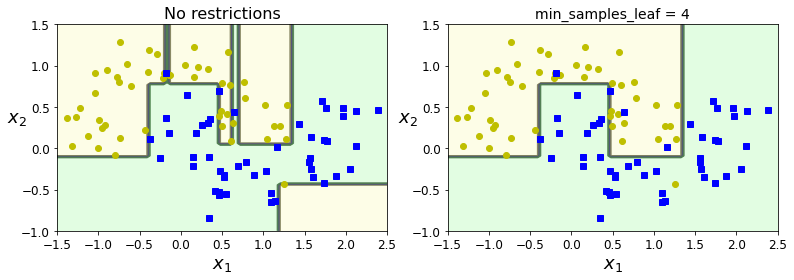

In [39]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

### example: decision tree great on 'onthogonal splits, not on different ones :(


Saving figure sensitivity_to_rotation_plot


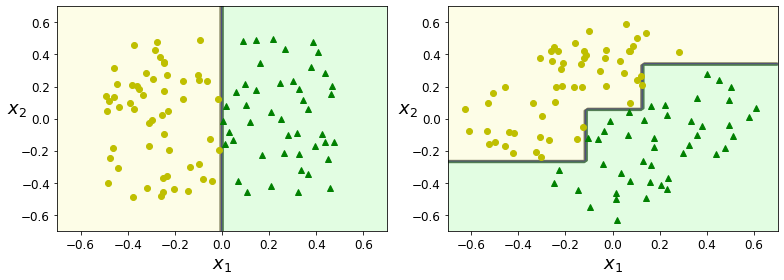

In [40]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()